In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('../Data/smarket.csv')
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['Direction_Int'] = lb_make.fit_transform(df['Direction'])
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Int
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Int
Year,1,0.03,0.031,0.033,0.036,0.03,0.54,0.03,0.075
Lag1,0.03,1,-0.026,-0.011,-0.003,-0.0057,0.041,-0.026,-0.04
Lag2,0.031,-0.026,1,-0.026,-0.011,-0.0036,-0.043,-0.01,-0.024
Lag3,0.033,-0.011,-0.026,1,-0.024,-0.019,-0.042,-0.0024,0.0061
Lag4,0.036,-0.003,-0.011,-0.024,1,-0.027,-0.048,-0.0069,0.0042
Lag5,0.03,-0.0057,-0.0036,-0.019,-0.027,1,-0.022,-0.035,0.0054
Volume,0.54,0.041,-0.043,-0.042,-0.048,-0.022,1,0.015,0.023
Today,0.03,-0.026,-0.01,-0.0024,-0.0069,-0.035,0.015,1,0.73
Direction_Int,0.075,-0.04,-0.024,0.0061,0.0042,0.0054,0.023,0.73,1


<BarContainer object of 5 artists>

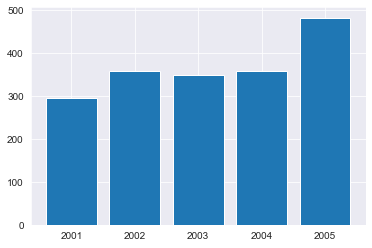

In [5]:
plt.bar(df['Year'].unique(), df.groupby('Year')['Volume'].sum())

In [6]:
from sklearn.linear_model import LogisticRegression

X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5',]]
y = df['Direction']


reg = LogisticRegression(random_state=0, solver='lbfgs').fit(X, y)

In [7]:
print('R2: {}'.format(reg.score(X,y)))
print('Coefficients: {}'.format(reg.coef_))
print('Intercept: {}'.format(reg.intercept_))

R2: 0.5312
Coefficients: [[-0.07114368 -0.04402138  0.00921062  0.00719358  0.0092884 ]]
Intercept: [0.07416154]


In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, reg.predict(X), ['Down', 'Up'])
cm

array([[114, 488],
       [ 98, 550]], dtype=int64)

In [9]:
print('Percent correct: {:.2f}%'.format(((cm[0][0] + cm[1][1]) / sum(sum(cm)))* 100))

Percent correct: 53.12%


In [14]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant

# statsmodels doesn't include a constant by default
# sklearn.Linear_Regression DOES include a constant by default
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5','Volume']]
X_ols = add_constant(X)
y = df['Direction_Int']

Logit(y,X_ols).fit().summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction_Int   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Fri, 06 Sep 2019   Pseudo R-squ.:                0.002074
Time:                        09:55:26   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [15]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
reg_ = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, reg_.predict(X_test))
cm

array([[54, 57],
       [60, 79]], dtype=int64)

In [18]:
print('Percent correct: {:.2f}%'.format(((cm[0][0] + cm[1][1]) / sum(sum(cm)))* 100))

Percent correct: 53.20%


### KNN

In [19]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../Data/smarket.csv')
lb_make = LabelEncoder()
df['Direction_Int'] = lb_make.fit_transform(df['Direction'])

df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Int
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [20]:
# train test split
from sklearn.model_selection import train_test_split

X = df[['Lag1', 'Lag2']]
y = df['Direction_Int']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn.predict(X_test))
cm

array([[54, 58],
       [67, 71]], dtype=int64)

In [23]:
print('Percent correct: {:.2f}%'.format(((cm[0][0] + cm[1][1]) / sum(sum(cm)))* 100))

Percent correct: 50.00%


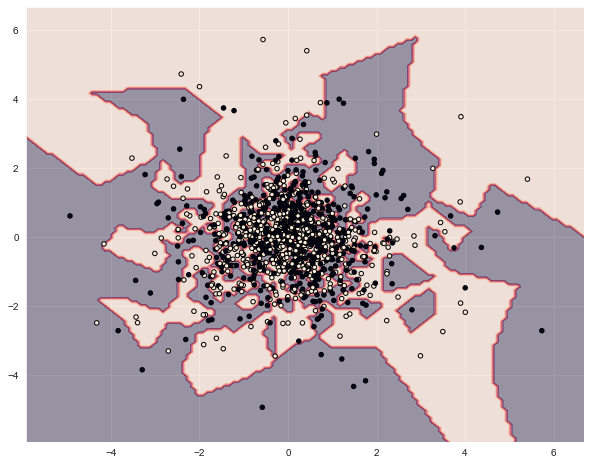

In [24]:
col1 = 'Lag1'
col2 = 'Lag2'

x_min, x_max = X[col1].min() - 1, X[col1].max() + 1
y_min, y_max = X[col2].min() - 1, X[col2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[col1], X[col2], c=y, s=20, edgecolor='k')

### KNN Standardize Variables
Differences in variables viewed in absolute terms otherwise

In [25]:
df2 = pd.read_csv('../Data/caravan.csv')
df2.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [26]:
df2.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = list(df2.columns)
num_cols.remove('Purchase')

X = scaler.fit_transform(df2[num_cols])

In [28]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df2['Purchase_Int'] = lb_make.fit_transform(df2['Purchase'])

In [29]:
# train test split
from sklearn.model_selection import train_test_split

y = df2['Purchase_Int']

X_train, X_test, y_train, y_test  = train_test_split(X, y)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [31]:
print('R2: {:.2f}%'.format(knn.score(X_test,y_test) * 100))

R2: 88.60%


In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn.predict(X_test))

print('Percent correct: {:.2f}%'.format(((cm[0][0] + cm[1][1]) / sum(sum(cm)))* 100))

Percent correct: 88.60%


In [33]:
from sklearn.linear_model import LogisticRegression

X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5',]]
y = df['Direction']

X_train, X_test, y_train, y_test  = train_test_split(X, y)

reg = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
print('R2: {:.2f}%'.format(reg.score(X_test,y_test) * 100))

R2: 50.48%


## #10

In [34]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

df3 = pd.read_csv('../Data/weekly.csv')
df3['Direction_Int'] = lb_make.fit_transform(df3['Direction'])
df3.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Int
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


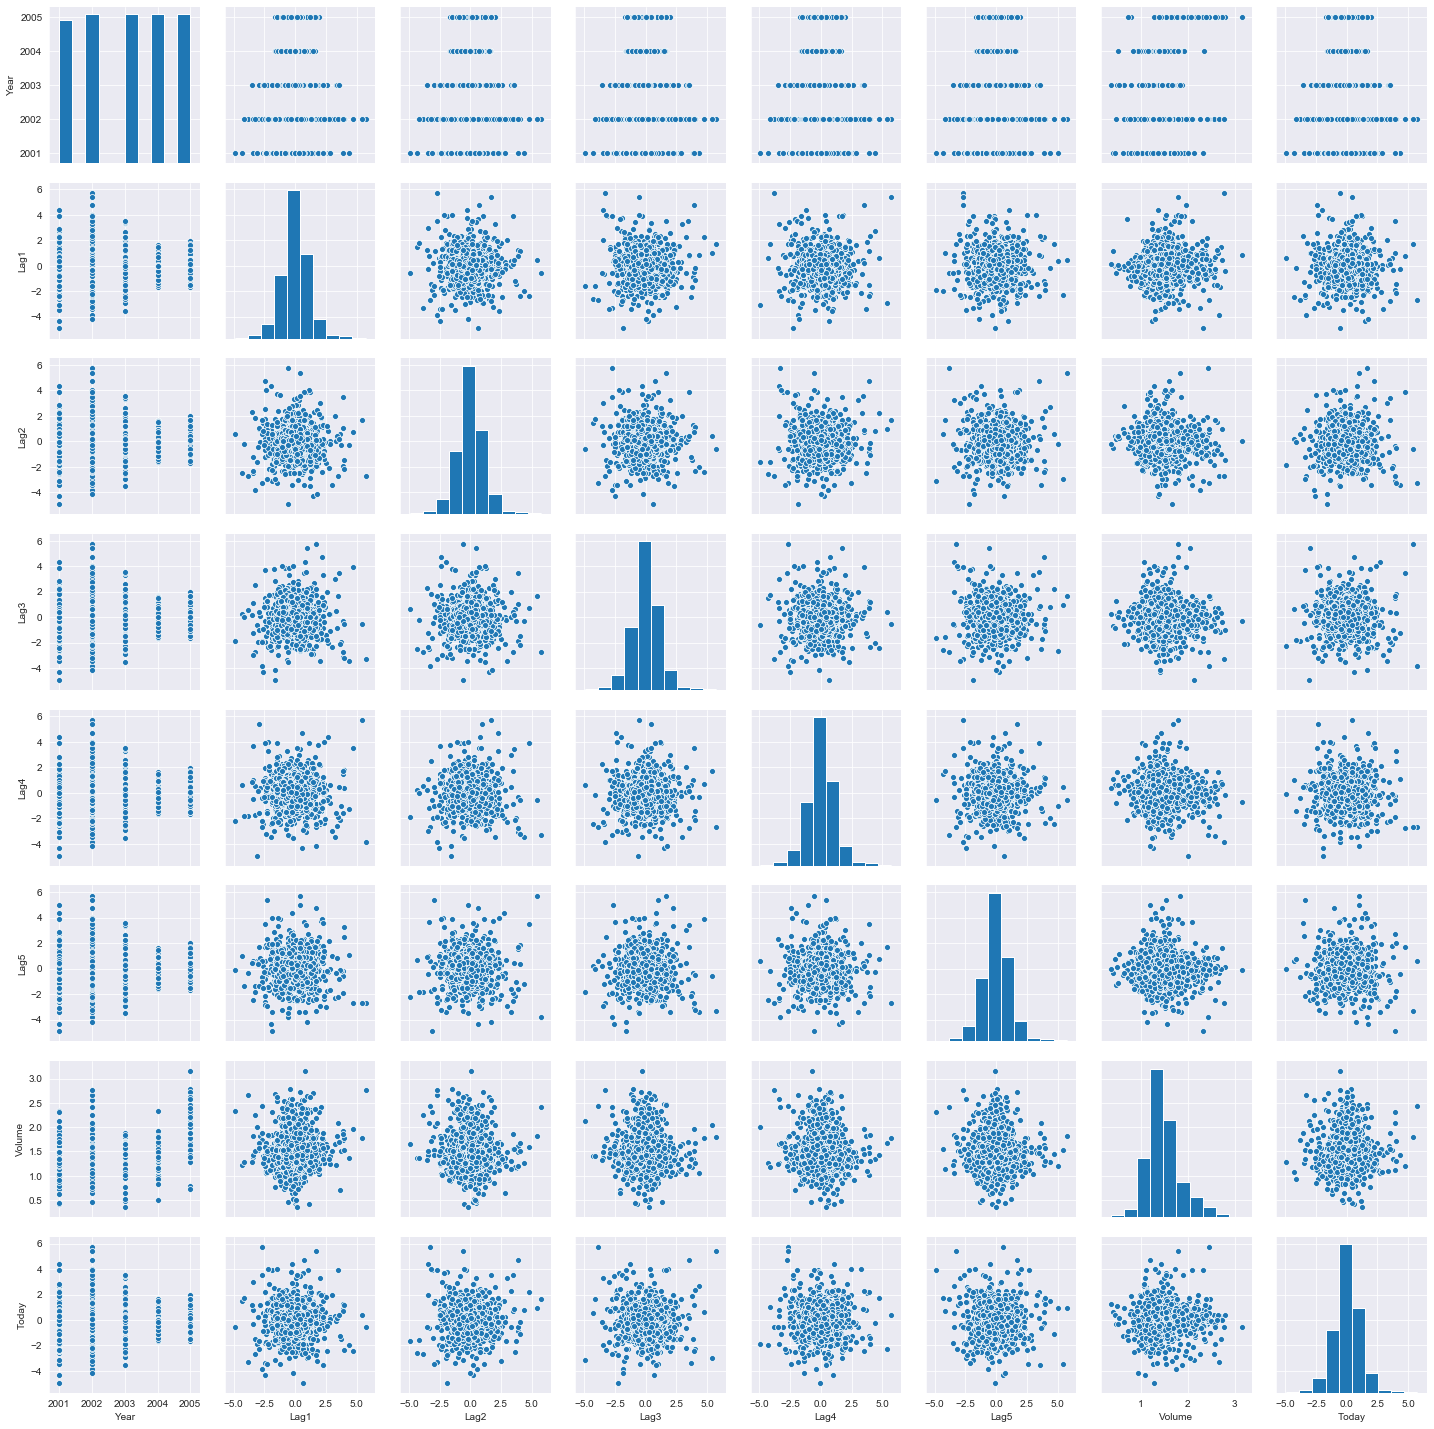

In [35]:
sns.pairplot(df[df.columns[:-2]])

In [36]:
from sklearn.linear_model import LogisticRegression

X = df3[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df3['Direction_Int']


reg = LogisticRegression(random_state=0, solver='lbfgs').fit(X, y)

In [38]:
from statsmodels.tools.tools import add_constant

X = df3[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5','Volume']]
X_ols = add_constant(X)
y = df3['Direction_Int']

Logit(y,X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.686896
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction_Int   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Fri, 06 Sep 2019   Pseudo R-squ.:               9.505e-05
Time:                        09:56:24   Log-Likelihood:                -748.03
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9996
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0327      0.026     -1.250      0.211      -0.084       0.019
Lag2           0.0682      0.027      2.556      0.011       0.016       0.120
Lag3          -0.0081      0.026     -0.306      0.759      -0.060       0.044
Lag4          -0.0194      0.026     -0.740      0.459      -0.071       0.032
Lag5          -0.0069      0.026     -0.261      0.794      -0.058       0.045
Volume         0.0569      0.027      2.125      0.034       0.004       0.109
==============================================================================
"""

In [39]:
from sklearn.metrics import confusion_matrix

y = df3['Direction_Int']

cm = confusion_matrix(y, reg.predict(X))
cm

array([[ 54, 430],
       [ 48, 557]], dtype=int64)

In [40]:
print('Percent correct: {:.2f}%'.format(((cm[0][0] + cm[1][1]) / sum(sum(cm)))* 100))

Percent correct: 56.11%


In [41]:
# train test split
from sklearn.model_selection import train_test_split

X = df3['Lag2'].values
y = df3['Direction_Int'].values

X = X.reshape(df3.shape[0], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

print('LR - R2: {:.2f}%'.format(reg.score(X_test, y_test) * 100))

LR - R2: 56.88%


In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
reg = LDA().fit(X_train, y_train)

print('LDA - R2: {:.2f}%'.format(reg.score(X_test, y_test) * 100))

LDA - R2: 57.34%


In [43]:
from sklearn.neighbors import KNeighborsClassifier as KNN
reg = KNN(n_neighbors=1).fit(X_train, y_train)

print('KNN - R2: {:.2f}%'.format(reg.score(X_test, y_test) * 100))

KNN - R2: 50.92%
